# Arvores de Decisão - Regressão

## Dicionário dos dados:

Aquisição de dados: Este é os dados de clima para Seattle, WA, em 2016,
usando o instrumento NOAA Climate Data Online.

- year: 2016
- month: número do mês do ano (por exemplo, 7 para julho)
- day: número do dia do ano (por exemplo, 30 para 30 de junho)
- week: dia da semana como uma string de caractere (por exemplo,
"segunda-feira")
- temp_1: temperatura de um dia anterior
- temp_2: temperatura de dois dias anteriores
- average: Média histórica da temperatura máxima
- Previsão do seu amigo (aleatório), valor menor 20 abaixo da média ou 20 acima da média
- actual: Medição de temperatura máxima real

Atividade:
1. Carregamento de dados
2. O valor esperado de saída é **actual**
3. Remover as colunas 'year', 'month', 'day', 'week' pois não vamos considerar dados históricos relacionados a série temporal
4. Análise descritiva dos dados
5. Remoção de campos desnecessários
6. Tratamento de dados nulos e/ou faltantes
7. Separação dos dados, holdout
8. Normalização dos dados
9. Treinamento de modelos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Obtenha os dados
** Leia o arquivo csv 'temps.csv' em um DataFrame **

In [ ]:
df = pd.read_csv('temps.csv')

** Verifique o cabeçalho do DataFrame.**

In [ ]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [ ]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Remoção das colunas year,	month, day e week, pois não vamos trabalhar com a série temporal

In [ ]:
df.drop(columns=["year", "month", "day", "week"], inplace=True)

In [ ]:
df.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,45,45,45.6,45,43,50,44,29
1,44,45,45.7,44,41,50,44,61
2,45,44,45.8,41,43,46,47,56
3,44,41,45.9,40,44,48,46,53
4,41,40,46.0,44,46,46,46,41


## Estatística Descritiva

Dados faltantes

<Axes: >

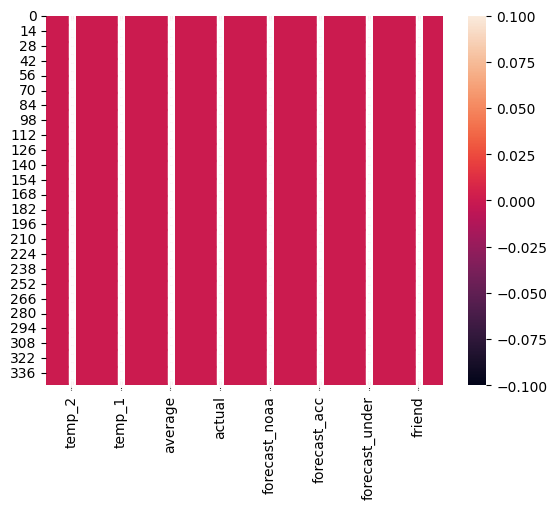

In [ ]:
#df.isnull()
#heatmap
sns.heatmap(df.isnull(), annot=True)

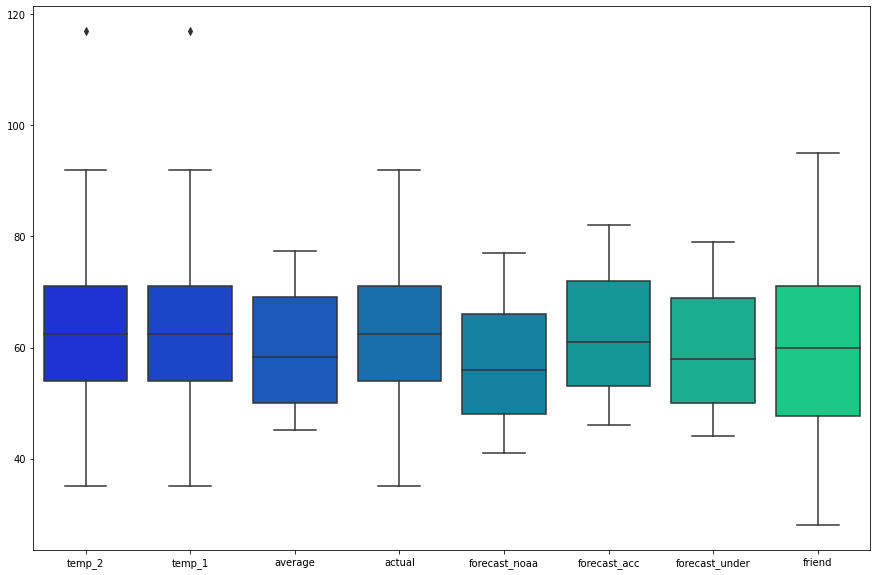

In [ ]:
#plot dos valores com boxplot

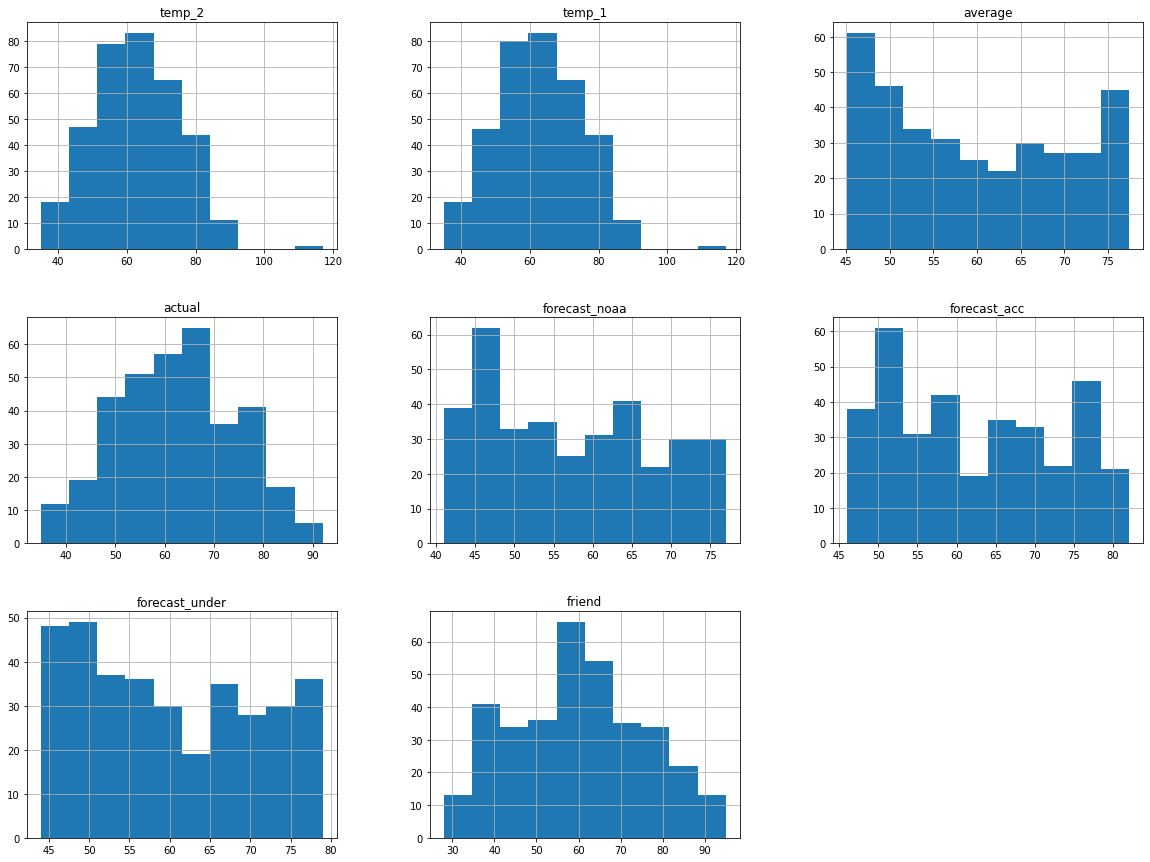

In [ ]:
#plot dos valores com histogramas

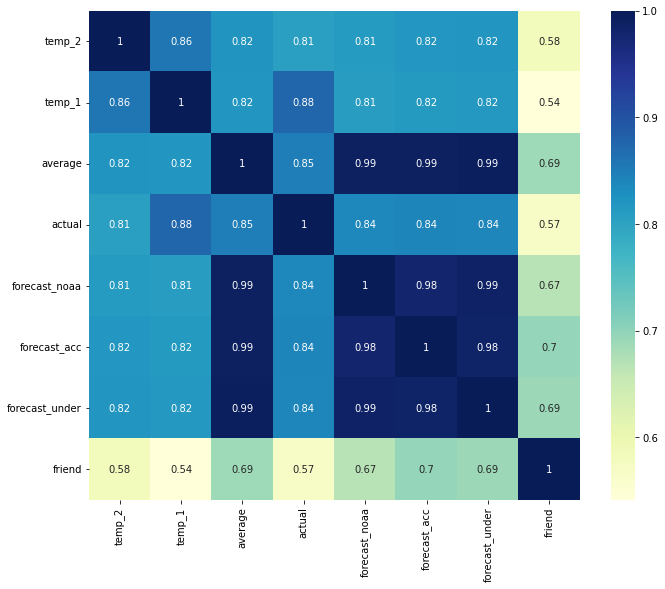

In [ ]:
#plot dos valores com matriz de correlação

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
pd.DataFrame(X_train)

,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
120,77,87,62.1,62,66,64,69
20,48,52,47.8,43,51,46,57
114,59,60,60.7,59,65,60,50
264,63,64,62.5,60,65,61,73
239,70,74,71.5,71,75,70,82
...,...,...,...,...,...,...,...
169,70,76,70.8,68,75,71,57
275,60,61,58.4,58,60,57,41
86,56,64,55.7,51,57,56,57
212,77,73,77.3,77,81,77,93


## Normalização dos dados

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

Converta as variáveis independentes com o StandardScaler

StandardScaler()

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

array([[ 1.17318321,  1.97519864,  0.17908574,  0.40319769,  0.31190317,
         0.35302158,  0.50816738],
       [-1.30444617, -0.92660895, -1.19312058, -1.40462993, -1.1366151 ,
        -1.33932067, -0.26821322],
       [-0.36465572, -0.26333864,  0.04474386,  0.11775122,  0.21533528,
        -0.02305447, -0.72110191]])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 120 to 340
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          261 non-null    int64  
 1   temp_1          261 non-null    int64  
 2   average         261 non-null    float64
 3   forecast_noaa   261 non-null    int64  
 4   forecast_acc    261 non-null    int64  
 5   forecast_under  261 non-null    int64  
 6   friend          261 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.3 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 49 to 244
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          87 non-null     int64  
 1   temp_1          87 non-null     int64  
 2   average         87 non-null     float64
 3   forecast_noaa   87 non-null     int64  
 4   forecast_acc    87 non-null     int64  
 5   forecast_under  87 non-null     int64  
 6   friend          87 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.4 KB


## Árvores de Decisão

In [ ]:
#importar a arvore de decisão
from sklearn import tree

In [ ]:
model = tree.DecisionTreeRegressor()

DecisionTreeRegressor()

### Executar o modelo treinado na base de treinamento

In [ ]:
#extrair as inferencias y_pred
#calcular o score

#treino
#model.score(X_test, y_test)

#teste
#model.score(X_test, y_test)

In [ ]:
# treino

1.0

In [ ]:
# teste

0.6227427193529973

### Avaliação de Regressores - Exibir os Resultados

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [ ]:
def print_metrics(y_test, y_test_pred):
  print("MEAN: ", mean_absolute_error(y_test, y_test_pred))
  print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_pred))
  print("MSE: ", mean_squared_error(y_test, y_test_pred))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print("R²: ", r2_score(y_test, y_test_pred))

In [ ]:
print_metrics(y_test, y_test_pred)

MEAN:  5.597701149425287
MAPE:  0.09033499949479644
MSE:  56.05747126436781
RMSE:  3142.4400845554233
R²:  0.6227427193529973


## Validação cruzada com o algoritmo Árvores de Decisão

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_cv_scores['test_score'].mean(), reg_cv_scores['test_score'].std()))

0.69 accuracy with a standard deviation of 0.10


### Exiba a árvore de decisão do modelo treinado

In [ ]:
from sklearn import tree

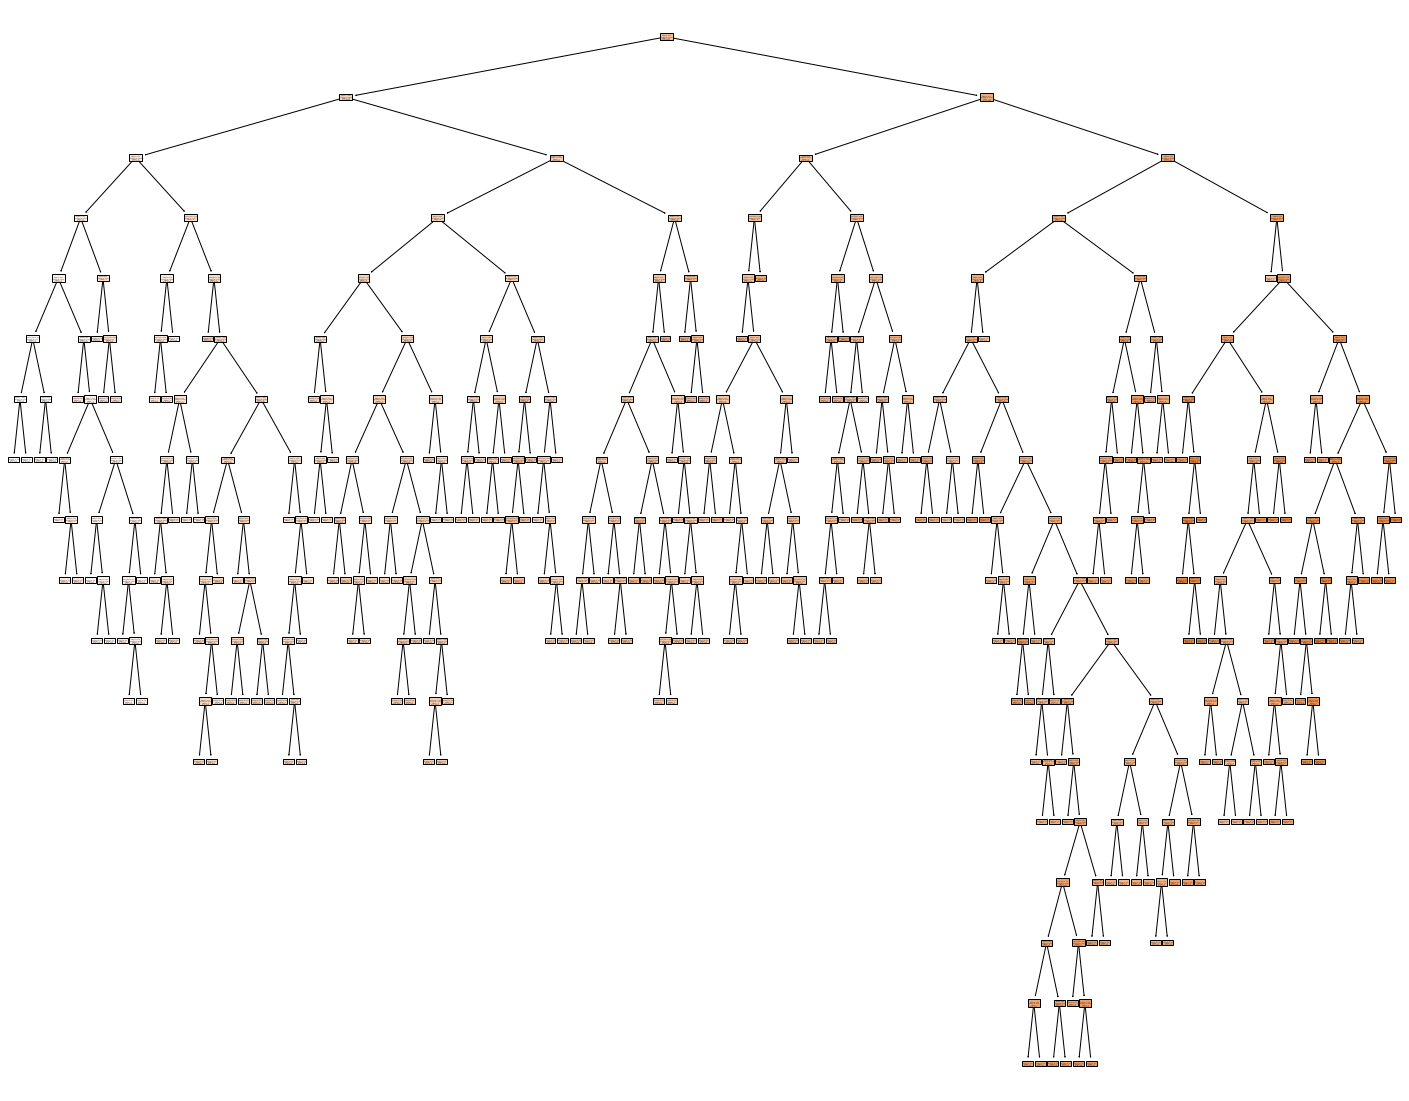

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(#MODELO,
                   feature_names=X_train.columns,
                   class_names=y_test.unique(),
                   filled=True)

### Avaliar o melhor valor de max_depth

Text(0, 0.5, 'Score Rate')

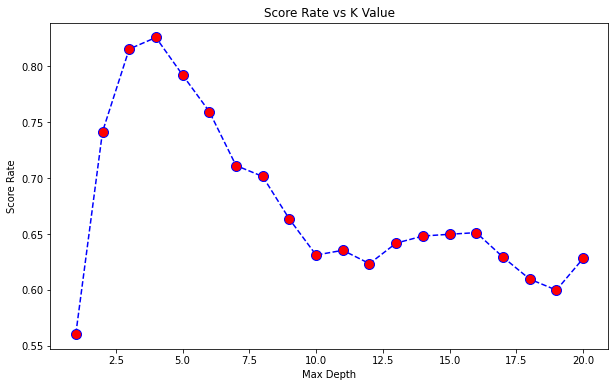

In [ ]:
import numpy as np

score = []

for i in range(1,21):
  #MODELO
  #FIT
  #SCORE

plt.figure(figsize=(10,6))
plt.plot(range(1,21), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Score Rate')

### Criar um regressor com o melhor valor para max_depth e avalie





In [ ]:
reg_best = DecisionTreeRegressor(max_depth=score.index(max(score))+1)

reg_best.fit(X_train, y_train)
print('Train: ', reg_best.score(X_train, y_train))
print('Test: ',reg_best.score(X_test, y_test))

Train:  0.8770739780380298
Test:  0.8295978517092348


In [ ]:
print_metrics(y_test, reg_best.predict(X_test))

MEAN:  4.07075887826395
MAPE:  0.06695221574918843
MSE:  25.32042195398782
RMSE:  641.1237679279884
R²:  0.8295978517092348


### Plot dos valores previstos vs reais

In [ ]:
y_pred = reg_best.predict(X_test)

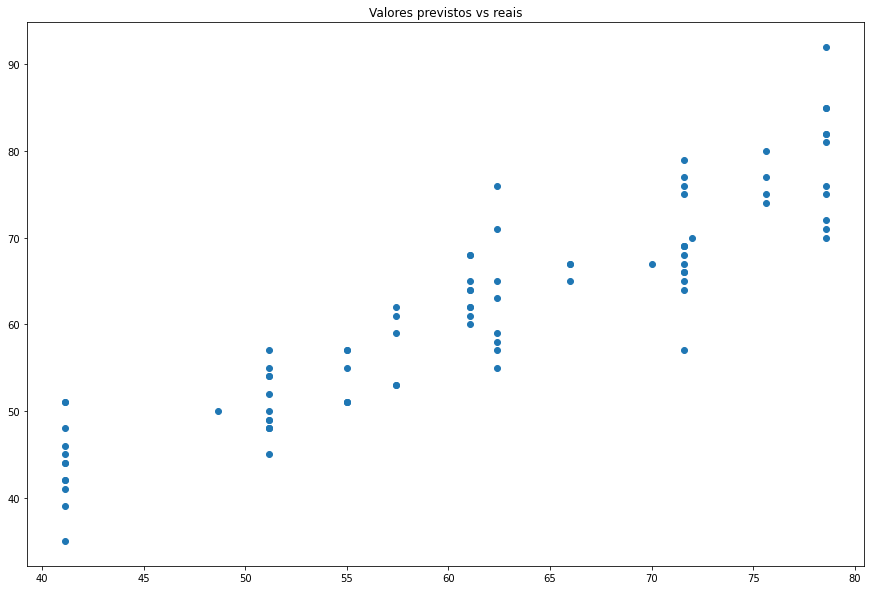

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_test)
plt.title('Valores previstos vs reais')
plt.show()

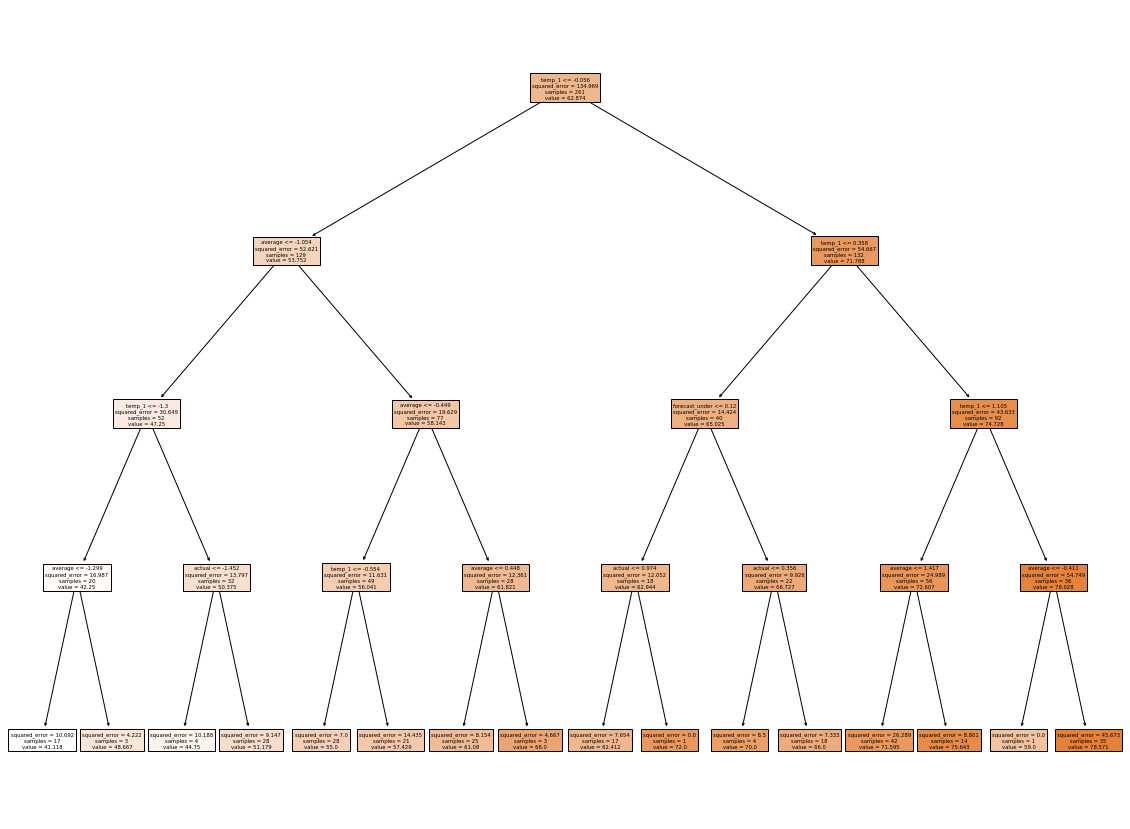

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.title('Melhor regressor')
_ = tree.plot_tree(reg_best,
                   feature_names=df.columns,
                   class_names=y_test.unique(),
                   filled=True)

Conclusão